## Dataset Breast Cancer

### Import Library

In [165]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'
import pydotplus
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from id3 import Id3Estimator
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

### Load Dataset

In [166]:
breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

### Splitting Dataset

In [167]:
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size = 0.2)

### Training Dataset
#### a. DecisionTreeClassifier

In [168]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz

model = DecisionTreeClassifier(random_state=0)

model.fit(X_train_set, y_train_set)

DTL_prediction = model.predict(X_test_set)

array_feature_name = []
for i in range(len(breast_cancer["feature_names"])):
    array_feature_name.append(breast_cancer["feature_names"][i])

r = export_text(model, feature_names=array_feature_name)
print(r)

|--- worst radius <= 16.80
|   |--- worst concave points <= 0.16
|   |   |--- worst concave points <= 0.14
|   |   |   |--- worst fractal dimension <= 0.06
|   |   |   |   |--- class: 0
|   |   |   |--- worst fractal dimension >  0.06
|   |   |   |   |--- radius error <= 0.64
|   |   |   |   |   |--- smoothness error <= 0.00
|   |   |   |   |   |   |--- mean texture <= 19.90
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- mean texture >  19.90
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- smoothness error >  0.00
|   |   |   |   |   |   |--- worst texture <= 33.27
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- worst texture >  33.27
|   |   |   |   |   |   |   |--- worst concave points <= 0.09
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- worst concave points >  0.09
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- radius error >  0.64
|   |   |   |   |   |--- mean rad

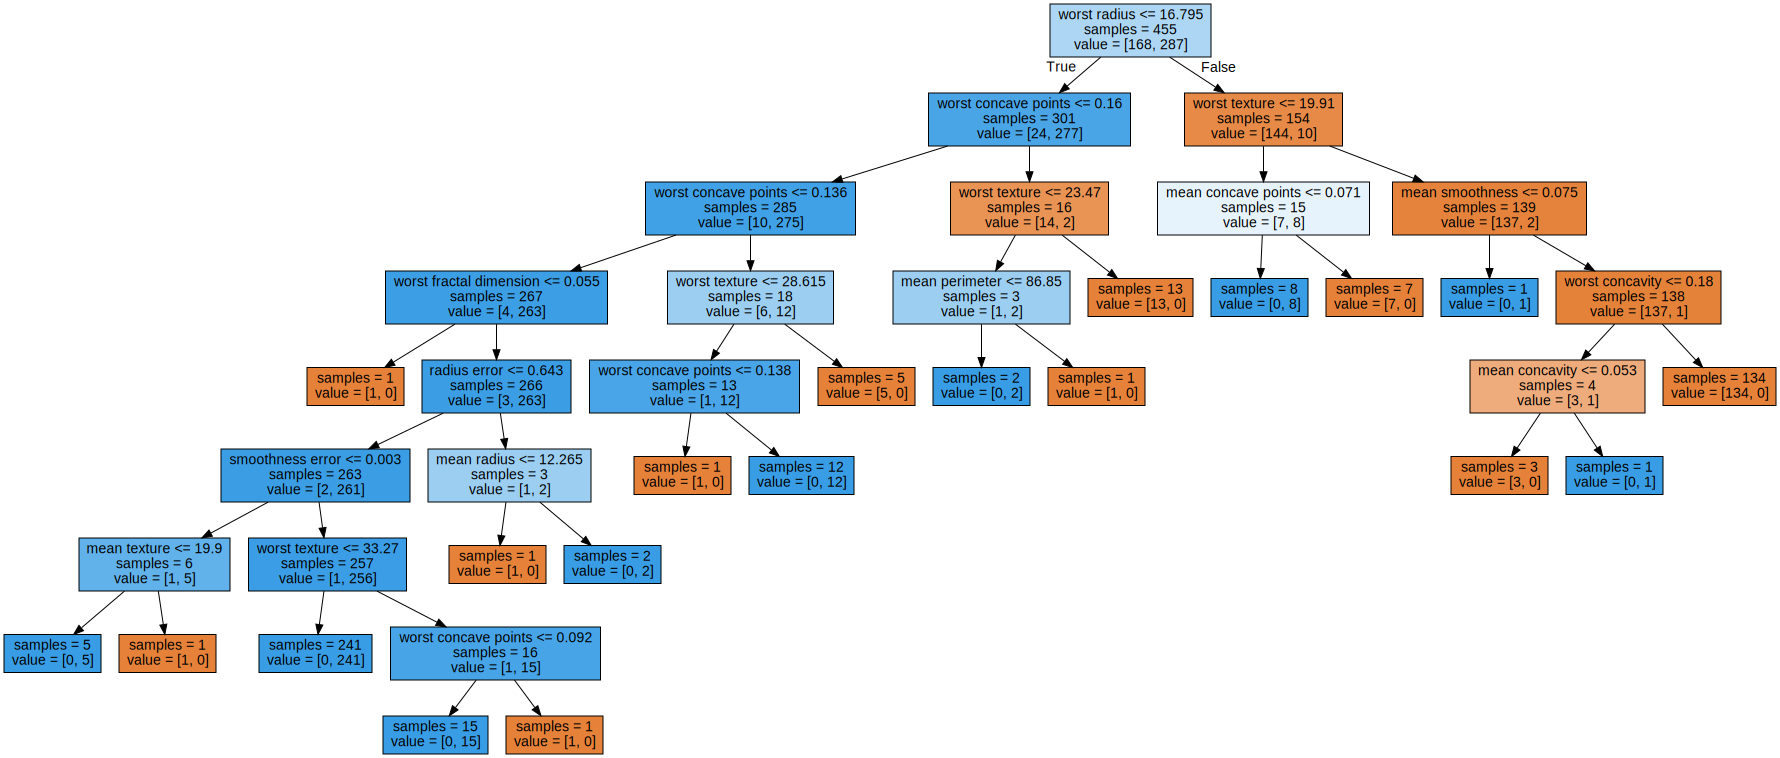

In [169]:
export_graphviz(model, out_file="dtl_tree_breast_cancer.dot",feature_names=breast_cancer["feature_names"], impurity=False, filled=True)

with open("dtl_tree_breast_cancer.dot") as f:
    dot_graph = f.read()
    
graph_dtl = graphviz.Source(dot_graph)

pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.write_pdf('dtl_tree_breast_cancer.pdf')

graph_dtl

#### b. Id3Estimator

In [170]:
from id3 import export_graphviz, export_text

model_id3 = Id3Estimator(max_depth=3)
model_id3 = model_id3.fit(X_train_set, y_train_set)

id3_prediction = model_id3.predict(X_test_set)

r = export_text(model_id3.tree_, feature_names=array_feature_name)
print(r)


worst radius <=16.80
|   worst concave points <=0.14
|   |   radius error <=0.64: 1 (261/2) 
|   |   radius error >0.64: 0 (2/2) 
|   worst concave points >0.14
|   |   worst texture <=26.90: 1 (14/4) 
|   |   worst texture >26.90: 0 (16) 
worst radius >16.80
|   mean concavity <=0.07
|   |   mean texture <=19.54: 1 (9/1) 
|   |   mean texture >19.54: 0 (11) 
|   mean concavity >0.07
|   |   radius error <=0.19: 1 (1) 
|   |   radius error >0.19: 0 (132) 



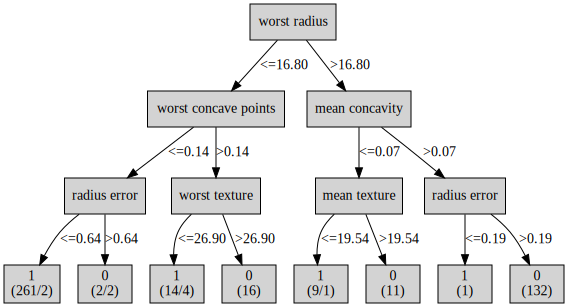

In [171]:
export_graphviz(model_id3.tree_, out_file="id3_tree_breast_cancer.dot",feature_names=array_feature_name)

with open("id3_tree_breast_cancer.dot") as f:
    dot_graph_id3 = f.read()
    
graph_id3 = graphviz.Source(dot_graph_id3)

pydot_graph = pydotplus.graph_from_dot_data(dot_graph_id3)
pydot_graph.write_pdf('id3_tree_breast_cancer.pdf')

graph_id3

#### c. K Means

In [172]:
model_kmeans = KMeans(n_clusters=2, random_state=0)

model_kmeans.fit(X_train_set)

kmeans_prediction = model_kmeans.predict(X_test_set)

#### d. LogisticRegression

In [173]:
model_logistic = LogisticRegression(max_iter=10000)

model_logistic.fit(X_train_set, y_train_set)

logistic_prediction = model_logistic.predict(X_test_set)

#### e. Neural_network

In [174]:
clf = MLPClassifier(max_iter=700, random_state=1).fit(X_train_set, y_train_set)

neural_prediction = clf.predict(X_test_set)

#### f. SVM

In [175]:
model_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))

model_svm.fit(X_train_set, y_train_set)

svm_prediction = model_svm.predict(X_test_set)

### Accuracy and F1-Score Table

In [176]:
# DecisionTreeClassifier
DTL_accuracy = accuracy_score(y_test_set, DTL_prediction)
DTL_f1 = f1_score(y_test_set, DTL_prediction)

# Id3Estimator
id3_accuracy = accuracy_score(y_test_set, id3_prediction)
id3_f1 = f1_score(y_test_set, id3_prediction)

# K Means
kmeans_accuracy = accuracy_score(y_test_set, kmeans_prediction)
kmeans_f1 = f1_score(y_test_set, kmeans_prediction)

# LogisticRegression
logistic_accuracy = accuracy_score(y_test_set, logistic_prediction)
logistic_f1 = f1_score(y_test_set, logistic_prediction)

# Neural_network
neural_accuracy = accuracy_score(y_test_set, neural_prediction)
neural_f1 = f1_score(y_test_set, neural_prediction)

# SVM
svm_accuracy = accuracy_score(y_test_set, svm_prediction)
svm_f1 = f1_score(y_test_set, svm_prediction)

accuracyAll = [DTL_accuracy, id3_accuracy, kmeans_accuracy, logistic_accuracy, neural_accuracy, svm_accuracy]
f1All = [DTL_f1, id3_f1, kmeans_f1, logistic_f1, neural_f1, svm_f1]
score_dataAll = {'accuracy': accuracyAll, 'f1': f1All}
allScore = pd.DataFrame(data = score_dataAll, index=['DecisionTreeClassifier', 'Id3Estimator', 'KMeans', 'LogisticRegression', 'Neural_Network', 'SVM'])
allScore

,accuracy,f1
DecisionTreeClassifier,0.947368,0.957746
Id3Estimator,0.938596,0.951049
KMeans,0.166667,0.000000
LogisticRegression,0.947368,0.958333
Neural_Network,0.947368,0.957143
SVM,0.964912,0.971831


## Dataset Play-tennis

### Load Dataset

In [177]:
dataset_play_tennis = pd.read_csv("PlayTennis.csv")
dataset_play_tennis_data = dataset_play_tennis[{'Outlook', 'Temperature', 'Humidity', 'Wind'}]
dataset_play_tennis_target = dataset_play_tennis[{'Play Tennis'}]

# dataset_play_tennis_target
# dataset_play_tennis_data

### Label Encoder

##### Humidity : 0 = "High", 1 = "Normal"
##### Temperature : 0 = "Cool", 1 = "Hot", 2 = "Mild"
##### Outlook : 0 = "Overcast", 1 = "Rain", 2 = "Sunny"
##### Wind : 0 = "Strong", 1 = "Weak"
##### Play Tennis : 0 = "No", 1 = "Yes"

In [178]:
le = LabelEncoder()

x_data_encoded = dataset_play_tennis_data.copy()
if dataset_play_tennis_data is not None:
    for column in dataset_play_tennis_data.columns:
        x_data_encoded[column] = le.fit_transform(x_data_encoded[column])

y_target_encoded = dataset_play_tennis_target.copy()
if dataset_play_tennis_target is not None:
    for column in dataset_play_tennis_target.columns:
        y_target_encoded[column] = le.fit_transform(y_target_encoded[column]) 

### Splitting Data

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x_data_encoded, y_target_encoded, test_size=0.2, random_state=1)

### Training Dataset
#### a. DecisionTreeClassifier

In [180]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz

model_pandas = DecisionTreeClassifier(max_depth = 10)

model_pandas.fit(x_train, y_train)

array_feature_name = []
for i in range(len(dataset_play_tennis_data.columns)):
    array_feature_name.append(dataset_play_tennis_data.columns[i])
    
DTL_prediction = model_pandas.predict(x_test)
    
r = export_text(model_pandas, feature_names=array_feature_name)
print(r)

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1



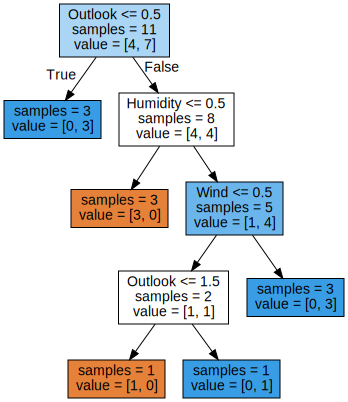

In [181]:
export_graphviz(model_pandas, out_file="dtl_tree_play_tennis.dot",feature_names=dataset_play_tennis_data.columns, impurity=False, filled=True)

with open("dtl_tree_play_tennis.dot") as f:
    dot_graph_pandas = f.read()
    
graph_dtl_pandas = graphviz.Source(dot_graph_pandas)

pydot_graph = pydotplus.graph_from_dot_data(dot_graph_pandas)
pydot_graph.write_pdf('dtl_tree_play_tennis.pdf')

graph_dtl_pandas

#### b. Id3Estimator

In [182]:
from id3 import export_graphviz, export_text

model_id3_pandas = Id3Estimator()
model_id3_pandas = model_id3_pandas.fit(x_train, y_train.values.ravel())

array_feature_name_pandas = []
for i in range(len(dataset_play_tennis_data.columns)):
    array_feature_name_pandas.append(dataset_play_tennis_data.columns[i])

id3_prediction = model_id3_pandas.predict(x_test)

r = export_text(model_id3_pandas.tree_, array_feature_name_pandas)
print(r)


Outlook <=0.50: 1 (3) 
Outlook >0.50
|   Humidity <=0.50: 0 (3) 
|   Humidity >0.50
|   |   Wind <=0.50
|   |   |   Temperature <=1.00: 0 (1) 
|   |   |   Temperature >1.00: 1 (1) 
|   |   Wind >0.50: 1 (3) 



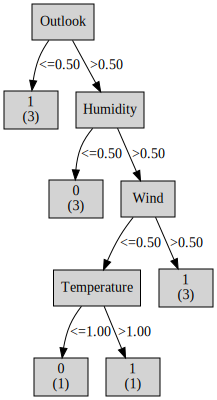

In [183]:
export_graphviz(model_id3_pandas.tree_, out_file="id3_tree_play_tennis.dot",feature_names=dataset_play_tennis_data.columns)

with open("id3_tree_play_tennis.dot") as f:
    dot_graph_id3_pandas = f.read()
    
graph_id3_pandas = graphviz.Source(dot_graph_id3_pandas)

pydot_graph = pydotplus.graph_from_dot_data(dot_graph_id3_pandas)
pydot_graph.write_pdf('id3_tree_play_tennis.pdf')

graph_id3_pandas

#### c. K Means

In [184]:
model_kmeans_pandas = KMeans(n_clusters=2, random_state=0)

model_kmeans_pandas.fit(x_train)

kmeans_prediction = model_kmeans_pandas.predict(x_test)

#### d. LogisticRegression

In [185]:
model_logistic_pandas = LogisticRegression(max_iter=10000)

model_logistic_pandas.fit(x_train, y_train.values.ravel())

logistic_prediction = model_logistic_pandas.predict(x_test)

#### e. Neural_network

In [186]:
clf_pandas = MLPClassifier(random_state=1, max_iter=700).fit(x_train, y_train.values.ravel())

neural_prediction = clf_pandas.predict(x_test)

#### f. SVM

In [187]:
model_svm_pandas = make_pipeline(StandardScaler(), SVC(gamma='auto'))

model_svm_pandas.fit(x_train, y_train.values.ravel())

svm_prediction = model_svm_pandas.predict(x_test)

### Accuracy and F1-Score Table

In [188]:
# DecisionTreeClassifier
DTL_accuracy = accuracy_score(y_test, DTL_prediction)
DTL_f1 = f1_score(y_test, DTL_prediction)

# Id3Estimator
id3_accuracy = accuracy_score(y_test, id3_prediction)
id3_f1 = f1_score(y_test, id3_prediction)

# K Means
kmeans_accuracy = accuracy_score(y_test, kmeans_prediction)
kmeans_f1 = f1_score(y_test, kmeans_prediction)

# LogisticRegression
logistic_accuracy = accuracy_score(y_test, logistic_prediction)
logistic_f1 = f1_score(y_test, logistic_prediction)

# Neural_network
neural_accuracy = accuracy_score(y_test, neural_prediction)
neural_f1 = f1_score(y_test, neural_prediction)

# SVM
svm_accuracy = accuracy_score(y_test, svm_prediction)
svm_f1 = f1_score(y_test, svm_prediction)

accuracyAll = [DTL_accuracy, id3_accuracy, kmeans_accuracy, logistic_accuracy, neural_accuracy, svm_accuracy]
f1All = [DTL_f1, id3_f1, kmeans_f1, logistic_f1, neural_f1, svm_f1]
score_dataAll = {'accuracy': accuracyAll, 'f1': f1All}
allScore = pd.DataFrame(data = score_dataAll, index=['DecisionTreeClassifier', 'Id3Estimator', 'KMeans', 'LogisticRegression', 'Neural_Network', 'SVM'])
allScore

,accuracy,f1
DecisionTreeClassifier,0.666667,0.666667
Id3Estimator,0.666667,0.666667
KMeans,1.000000,1.000000
LogisticRegression,0.666667,0.800000
Neural_Network,1.000000,1.000000
SVM,1.000000,1.000000
